In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]


In [ ]:

clusters={}

def initializeClusterCentroids():
 
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []
      
      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster 
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):

     
        distance_of_i = [] 
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center'])  
         
            distance_of_i.append(d)
   
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix]) 


def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        
        cluster_points = np.array(cluster_points)
       
        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) 
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = []

In [ ]:

def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)
        
        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

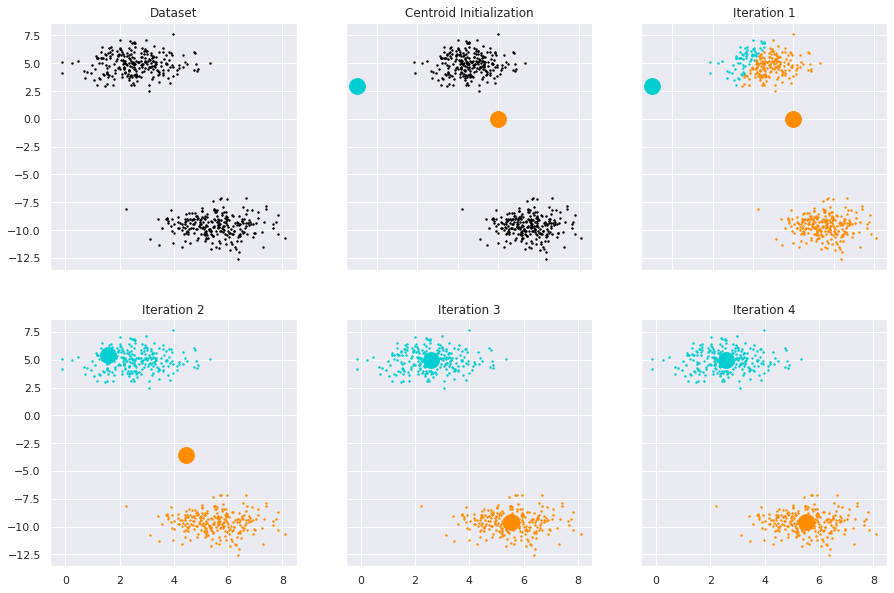

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):
    center = clusters[i]['center']
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

for ax in axs.flat:
    ax.label_outer()

Let us now try the same thing with different number of clusters. We will also see how initialization matters.

In [ ]:
# Generating Synthetic Data

k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


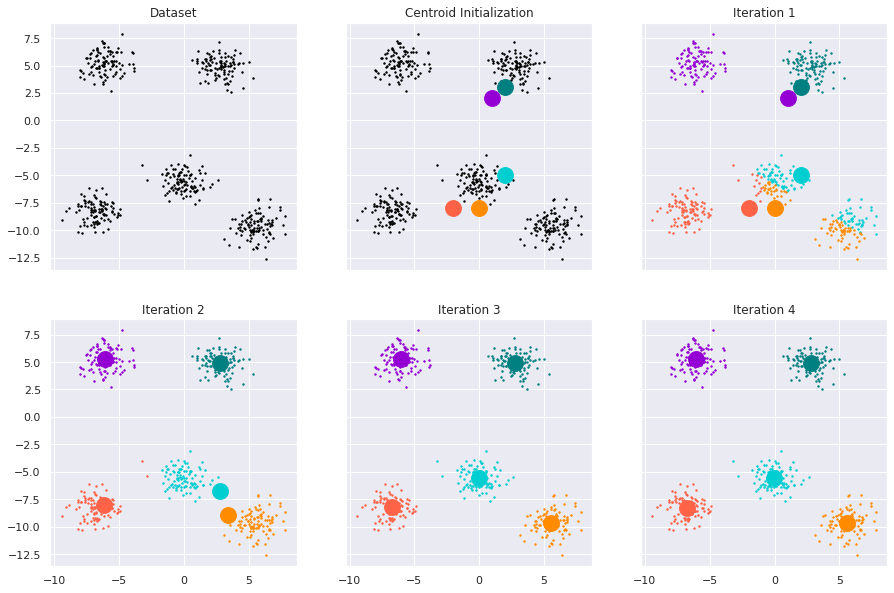

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

**As you can see, changing the random seed and hence changing the initialization has a large effect on the performance of KMeans.**

Hence our KMeans algo can be run by calling the following function with appropriate X (dataset)

In [ ]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

KMeans(n_clusters=5)

ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[ 5.56873506 -9.60861515]
 [-6.06533341  5.2400571 ]
 [-6.78567723 -8.26282547]
 [ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]]



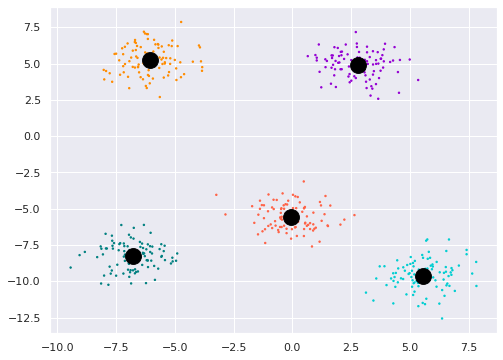

In [ ]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

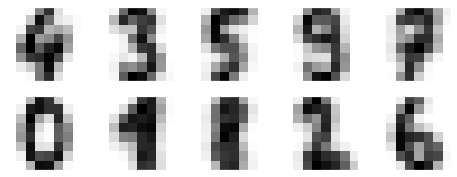

In [ ]:
# We can now see how the centers of the clusters formed are

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

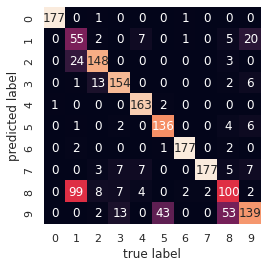

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets

In [ ]:
#import the dataset
iris = datasets.load_iris()
# print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let us start with assigning the initial number of clusters as k=5.

In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

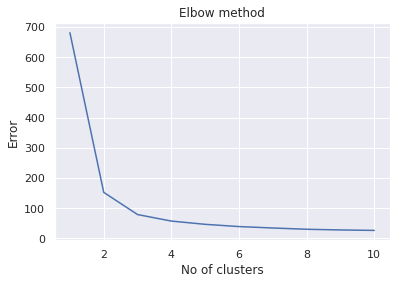

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

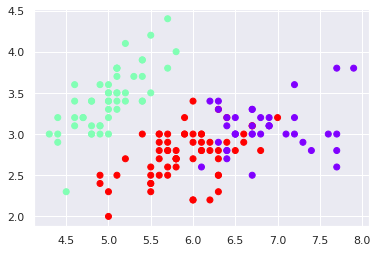

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

In [ ]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [ ]:
X = dataset.iloc[:, [3, 4]].values

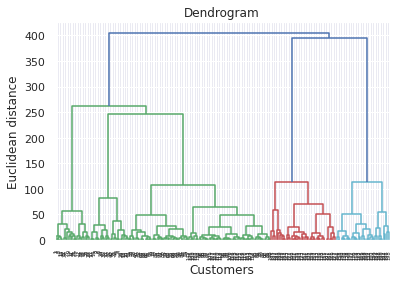

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

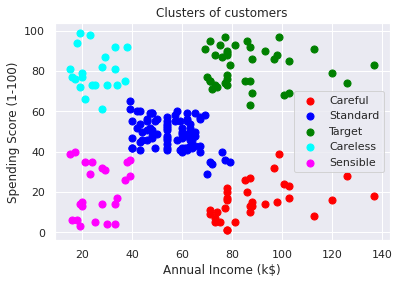

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


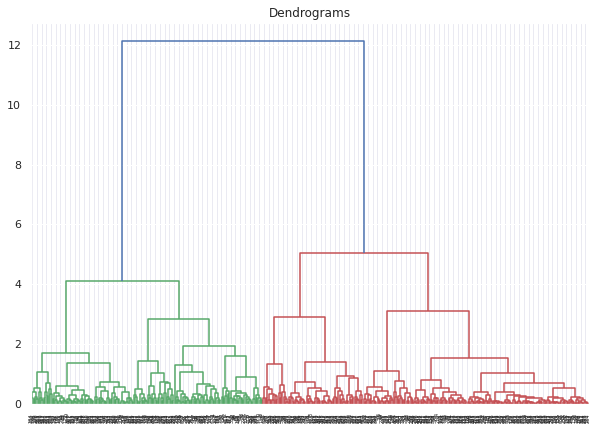

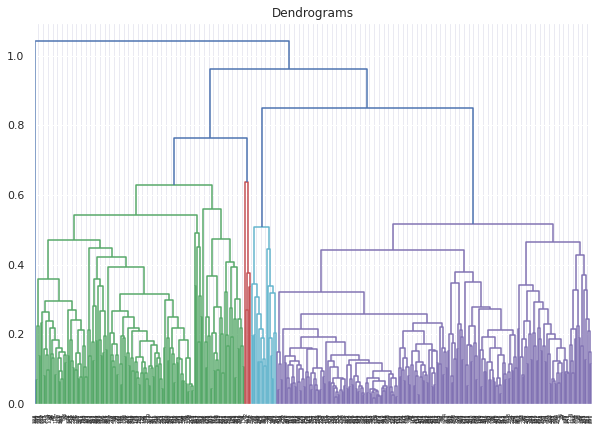

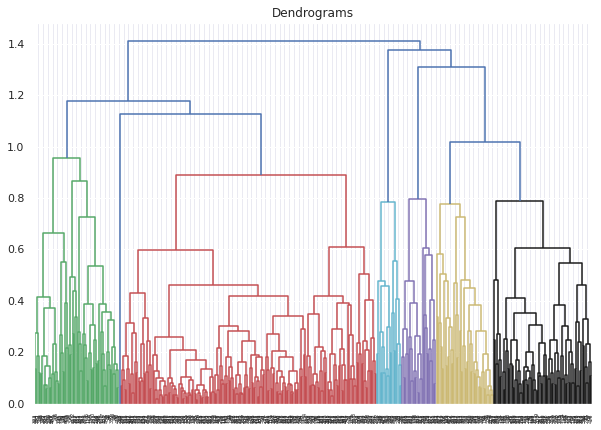

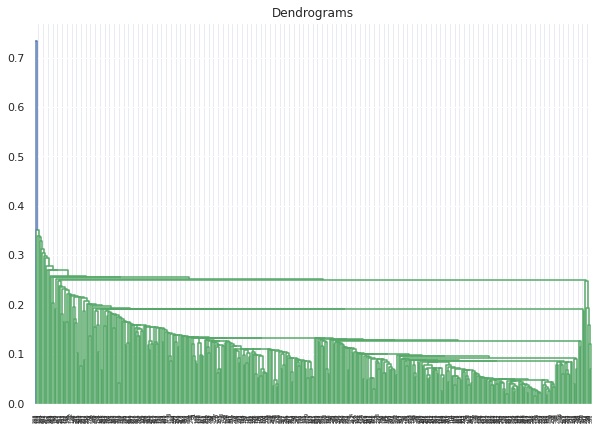

In [ ]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms")  
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

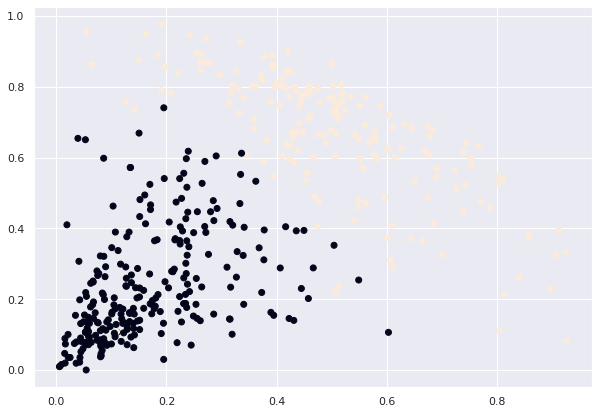

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 